In [1]:
import pandas as pd
import numpy as np
import pylab as plt

df = pd.read_csv('F:\\Study\\kaggle-titanic-master\\input\\train.csv')

df['Pclass'].isnull().value_counts()


False    891
Name: Pclass, dtype: int64

In [2]:
df['Survived'].isnull().value_counts()


False    891
Name: Survived, dtype: int64

In [3]:
survivors = df.groupby('Pclass')['Survived'].agg(sum)

In [4]:
total_passenegers = df.groupby('Pclass')['PassengerId'].count()
survivor_percentage = survivors / total_passenegers

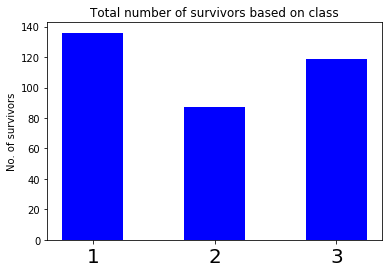

In [5]:
#plotting total number of survivors
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(survivors.index.values.tolist(), survivors, color = 'blue', width = 0.5)
ax.set_ylabel('No. of survivors')
ax.set_title('Total number of survivors based on class')
xTickMarks = survivors.index.values.tolist()
ax.set_xticks(survivors.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize = 20)
plt.show()

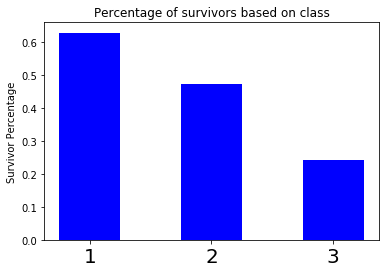

In [6]:
#plotting the percentage of survivors in each class

fig = plt.figure()
ax =fig.add_subplot(111)

rect = ax.bar(survivor_percentage.index.values.tolist(), survivor_percentage, color = 'blue', width = 0.5)
ax.set_ylabel('Survivor Percentage')
ax.set_title('Percentage of survivors based on class')
xTickMarks = survivors.index.values.tolist()
ax.set_xticks(survivors.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize = 20)
plt.show()



In [7]:
#checking for any null values
df['Sex'].isnull().value_counts()

False    891
Name: Sex, dtype: int64

In [8]:
#male passenegers survived in each class
male_survivors = df[df['Sex'] ==  'male'].groupby('Pclass')['Survived'].agg(sum)

#total male passengers in each class 

male_total_passengers = df[df['Sex'] == 'male'].groupby('Pclass')['PassengerId'].count()
male_survivor_percentage = male_survivors / male_total_passengers

#female passengers survived in each class 
female_survivors = df[df['Sex'] == 'female'].groupby('Pclass')['Survived'].agg(sum)

#total female passengers in each calss

female_total_passengers = df[df['Sex'] == 'female'].groupby('Pclass')['PassengerId'].count()
female_survivor_percentage = female_survivors / female_total_passengers

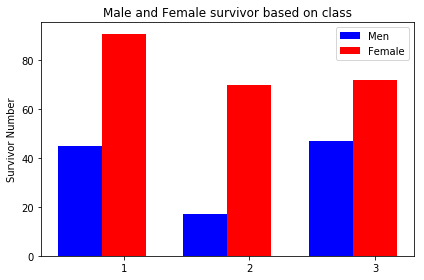

In [9]:
#plotting a graph based on gender 

fig = plt.figure()
ax = fig.add_subplot(111)
index = np.arange(male_survivors.count())
bar_width = 0.35
rect1 = ax.bar(index, male_survivors, bar_width, color = 'blue', label = 'Men')
rect2 = ax.bar(index + bar_width,female_survivors, bar_width, color = 'red', label = 'Female')
ax.set_ylabel('Survivor Number')
ax.set_title('Male and Female survivor based on class')
xTickMarks = male_survivors.index.values.tolist()
ax.set_xticks(index + bar_width)
xTickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames,fontsize = 20)
plt.legend()
plt.tight_layout()
plt.show()


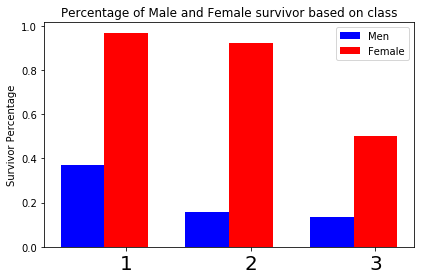

In [10]:
#plotting for percentage of surviviors based on gender
fig = plt.figure()
ax = fig.add_subplot(111)
index = np.arange(male_survivor_percentage.count())
bar_width = 0.35
rect1 = ax.bar(index, male_survivor_percentage, bar_width, color = 'blue', label = 'Men')
rect2 = ax.bar(index + bar_width, female_survivor_percentage, bar_width, color = 'red', label = 'Female')
ax.set_ylabel('Survivor Percentage')
ax.set_title('Percentage of Male and Female survivor based on class')
xTickMarks = male_survivor_percentage.index.values.tolist()
ax.set_xticks(index + bar_width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize = 20)
plt.legend()
plt.tight_layout()
plt.show()


In [11]:
#Non Survivors among the various classes who have family aboard on the ship
#checking for null values
df['SibSp'].isnull().value_counts()


False    891
Name: SibSp, dtype: int64

In [12]:
#checking for null values
df['Parch'].isnull().value_counts()


False    891
Name: Parch, dtype: int64

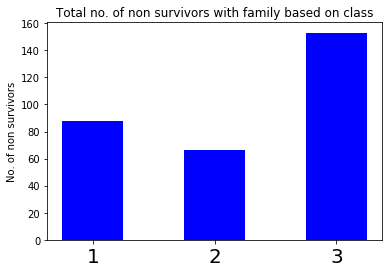

In [13]:
#total number of non survivors
non_survivors = df[(df['SibSp'] > 0) | (df['Parch'] > 0) & (df['Survived']== 0)].groupby('Pclass')['Survived'].agg('count')

#total passengers in each class
total_passengers = df.groupby('Pclass')['PassengerId'].count()
non_survivor_percentage = non_survivors / total_passengers

#total number of non survivor with family based on class
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(non_survivors.index.values.tolist(), non_survivors, color = 'blue', width = 0.5)
ax.set_ylabel('No. of non survivors')
ax.set_title('Total no. of non survivors with family based on class')
xTickMarks = non_survivors.index.values.tolist()
ax.set_xticks(non_survivors.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize = 20)
plt.show()

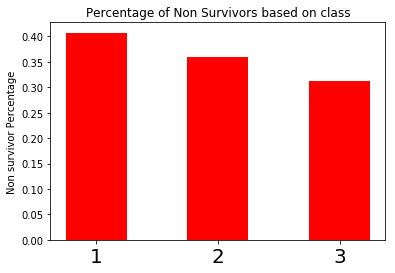

In [14]:
#plot percentage of non survivor based on class
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(non_survivor_percentage.index.values.tolist(), non_survivor_percentage, color = 'red', width = 0.5)
ax.set_ylabel('Non survivor Percentage')
ax.set_title('Percentage of Non Survivors based on class')
xTickMarks = non_survivor_percentage.index.values.tolist()
ax.set_xticks(non_survivor_percentage.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize = 20)
plt.show()


In [15]:
#survival percentage among different age group
#checking for null values
df['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

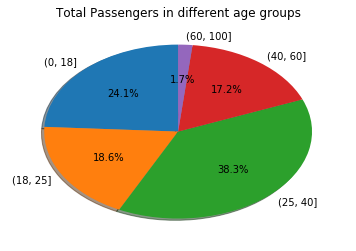

In [16]:
#defining age bin interval 
age_bin = [0, 18, 25, 40, 60, 100]

#creating bins
df['AgeBin'] = pd.cut(df.Age, bins = age_bin)

#removing the null
d_temp = df[np.isfinite(df['Age'])] #remove all null instance

#number of survivors based on AgeBin
survivors = d_temp.groupby('AgeBin')['Survived'].agg(sum)

#total passengers in each bin
total_passengers = d_temp.groupby('AgeBin')['Survived'].agg(sum)

#plotting pie chart
plt.pie(total_passengers, labels = total_passengers.index.values.tolist(), autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.title('Total Passengers in different age groups')
plt.show()


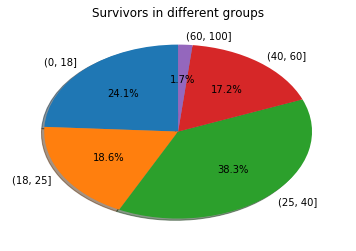

In [17]:
#plotting the pie chart of percentage passenegers in each bin
plt.pie(survivors, labels = survivors.index.values.tolist(), autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.title('Survivors in different groups')
plt.show()